<a href="https://colab.research.google.com/github/DarshanBothra/CNN-Digit_Recognition-PyTorch/blob/main/CNN_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch as pt
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

from sklearn.metrics import confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Convert MNIST Images into tensor of 4-Dimensions (Number of Images, Height, Width, Color Channel)
transform = transforms.ToTensor()

In [3]:
# Import MNIST Data files for training and testing sets

train_data = datasets.MNIST(root = 'data', train = True, download = True, transform = transform) # Training dataset
test_data = datasets.MNIST(root = 'data', train = False, download = True, transform = transform) # Testing dataset

100%|██████████| 9.91M/9.91M [00:00<00:00, 16.0MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 481kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.46MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.97MB/s]


In [4]:
# Create a batch size for images
train_loader = DataLoader(train_data, batch_size = 10, shuffle = True)
test_loader = DataLoader(test_data, batch_size = 10, shuffle = False)


In [5]:
# Define CNN Model

class ConvolutionalNeuralNet(nn.Module): # Convolution -> Pooling -> Convolution -> Pooling
  def __init__(self):
    super().__init__()

    # Convolution Layers
    self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 8, kernel_size = 3, stride = 1, padding = 1) # Layer 1
    self.conv2 = nn.Conv2d(in_channels = 8, out_channels = 16, kernel_size = 3, stride = 1, padding = 1) # Layer 2

    # Fully Connected Layers
    self.fc1 = nn.Linear(7*7*16, 128)
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64, 10)

  def forward(self, X):
    X = F.leaky_relu(self.conv1(X))
    # Pooling Layer 1
    X = F.max_pool2d(X, kernel_size = 2, stride = 2)

    X = F.leaky_relu(self.conv2(X))
    # Pooling Layer 2
    X = F.max_pool2d(X, kernel_size = 2, stride = 2)

    X = X.view(-1, 7*7*16)

    # Fully connected layers
    # Forwrding

    X = F.leaky_relu(self.fc1(X))

    X = F.leaky_relu(self.fc2(X))

    X = self.fc3(X)

    return F.log_softmax(X, dim = 1)


In [6]:
# Create an instance of the Model

seed = pt.manual_seed(52)
model = ConvolutionalNeuralNet()
model

ConvolutionalNeuralNet(
  (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [7]:
# Loss Function Optimizer
lossFN = nn.CrossEntropyLoss()
optimizer = pt.optim.Adam(model.parameters(), lr = 0.001) # Smaller the learning rate, the longer it will take to train the model and more accurate


In [8]:
# Training the Model
import time
start_time = time.time()

# Create variables to track stuff (hyper-parameters)

epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

# For loop of epochs
for i in range(epochs):
  trn_corr = 0
  tst_corr = 0

  # Training
  for b, (X_train, y_train) in enumerate(train_loader):

    b +=1

    y_pred = model(X_train)
    loss = lossFN(y_pred, y_train)

    predicted = pt.max(y_pred.data, 1)[1]
    batch_corr = (predicted == y_train).sum()
    trn_corr += batch_corr

    # Update Parameters

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print Results

    if b%600 == 0:
      print(f'epoch: {i}  batch: {b}  loss: {loss.item()}  \accuracy: {trn_corr.item()*100/(10*b)}%')

  train_losses.append(loss)
  train_correct.append(trn_corr)

  # Testing
  with pt.no_grad():
    for b, (X_test, y_test) in enumerate(test_loader):
      y_eval = model(X_test)
      predicted = pt.max(y_eval.data, 1)[1]
      tst_corr += (predicted == y_test).sum()

  loss = lossFN(y_eval, y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)


current_time = time.time()

diff = current_time - start_time
print(f"Trainign took {diff/60} mintes")

epoch: 0  batch: 600  loss: 0.17742010951042175  ccuracy: 78.03333333333333%
epoch: 0  batch: 1200  loss: 0.0328683964908123  ccuracy: 85.98333333333333%
epoch: 0  batch: 1800  loss: 0.014312075451016426  ccuracy: 89.05555555555556%
epoch: 0  batch: 2400  loss: 0.07512219250202179  ccuracy: 90.7875%
epoch: 0  batch: 3000  loss: 0.002035572426393628  ccuracy: 91.91666666666667%
epoch: 0  batch: 3600  loss: 0.19288919866085052  ccuracy: 92.76944444444445%
epoch: 0  batch: 4200  loss: 0.014241321012377739  ccuracy: 93.34761904761905%
epoch: 0  batch: 4800  loss: 0.016960639506578445  ccuracy: 93.92291666666667%
epoch: 0  batch: 5400  loss: 0.0008985765161924064  ccuracy: 94.33888888888889%
epoch: 0  batch: 6000  loss: 0.009794086217880249  ccuracy: 94.67166666666667%
epoch: 1  batch: 600  loss: 0.0011188543867319822  ccuracy: 97.8%
epoch: 1  batch: 1200  loss: 0.0005280355107970536  ccuracy: 97.95%
epoch: 1  batch: 1800  loss: 0.0019212104380130768  ccuracy: 98.06111111111112

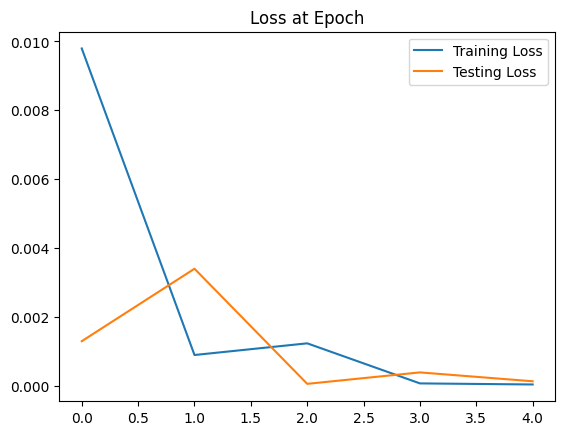

In [14]:
# train_losses = [t1.item() for t1 in train_losses]
plt.plot(train_losses, label = "Training Loss")
plt.plot(test_losses, label = "Testing Loss")
plt.title("Loss at Epoch")
plt.legend()

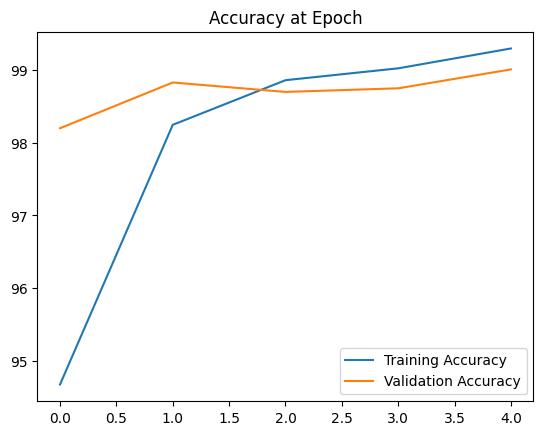

In [19]:
# Graph the accuracy at the end of each epoch
plt.plot([t/600 for t in train_correct], label = "Training Accuracy")
plt.plot([t/100 for t in test_correct], label = "Validation Accuracy")
plt.title("Accuracy at Epoch")
plt.legend()

In [20]:
test_load_everything = DataLoader(test_data, batch_size = 10000, shuffle = False)


In [24]:
with pt.no_grad():
  correct = 0
  for X_test, y_test in test_load_everything:
    y_eval = model(X_test)
    predicted = pt.max(y_eval.data, 1)[1]
    correct += (predicted == y_test).sum()

print(f"Test Accuracy: {correct/10000*100}")

Test Accuracy: 99.01000213623047


In [40]:
# Predict for new images!

Image = test_data[4143] # Tesor with image in it
actual = Image[-1]
pred = model(Image[0].view(1, 1, 28, 28))
pred = pt.max(pred, 1)[1]

print(f"Actual Image: {actual}\nPredicted Image: {int(pred)}")

Actual Image: 9
Predicted Image: 9
